# TECHNICAL PROJECT 

## Airbnb Analysis

### Objective : Optimize Airbnb property listings and host performance to increase booking rates and revenue.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sb
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sqlite3
import mysql.connector as sql

### Importing File

In [3]:
df=pd.read_csv(r"C:\Users\ALFIN\Desktop\Projects\Technical Project\Airbnb_Open_Data.csv")

In [4]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [5]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.shape

(102599, 26)

In [10]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [11]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [12]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

### Missing value treatment

In [18]:
missing_data = df.isnull().sum()

for column in df.columns:
    if missing_data[column] > 0:
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            df[column].fillna(df[column].mean(), inplace=True)
        elif df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)

#Drop columns with more than 30% missing values
threshold = 0.30 * len(df)
data = df.dropna(thresh=threshold, axis=1)

In [19]:
df.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64

### Saving cleaned dataset

In [20]:
df.to_csv("clean_airbnb_data.csv", index=False)

### Separating categorical and Numerical columns

In [25]:
numerical_columns = []
categorical_columns = []

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        numerical_columns.append(column)
    elif data[column].dtype == 'object':
        categorical_columns.append(column)

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['id', 'host id', 'lat', 'long', 'Construction year', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']

Categorical Columns:
['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'country', 'country code', 'cancellation_policy', 'room type', 'price', 'service fee', 'last review', 'house_rules', 'license']


In [26]:
def count(ax,count='no_of_rows'):
    for bar in ax.patches:
        percentage= f'{round(bar.get_height(),2)}'
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),va='bottom',ha='center')
count(ax,count='no_of_rows')

NameError: name 'ax' is not defined

## Univariate Analysis of Numerical Columns

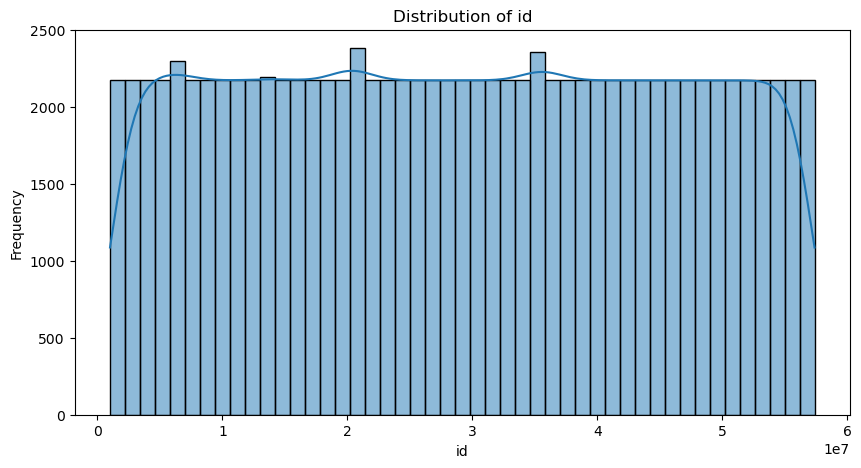

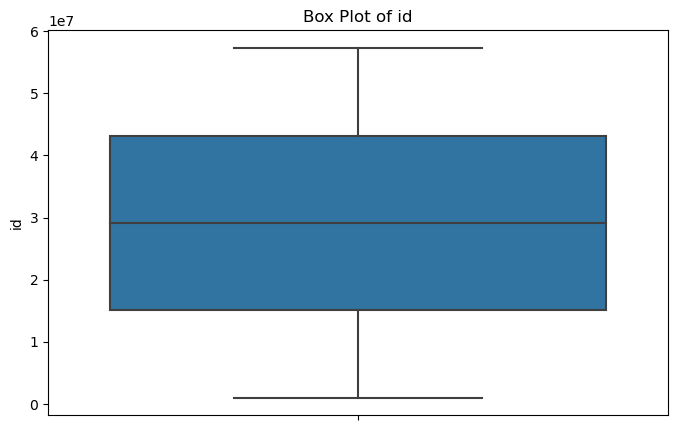

Summary Statistics for id:
count    1.025990e+05
mean     2.914623e+07
std      1.625751e+07
min      1.001254e+06
25%      1.508581e+07
50%      2.913660e+07
75%      4.320120e+07
max      5.736742e+07
Name: id, dtype: float64


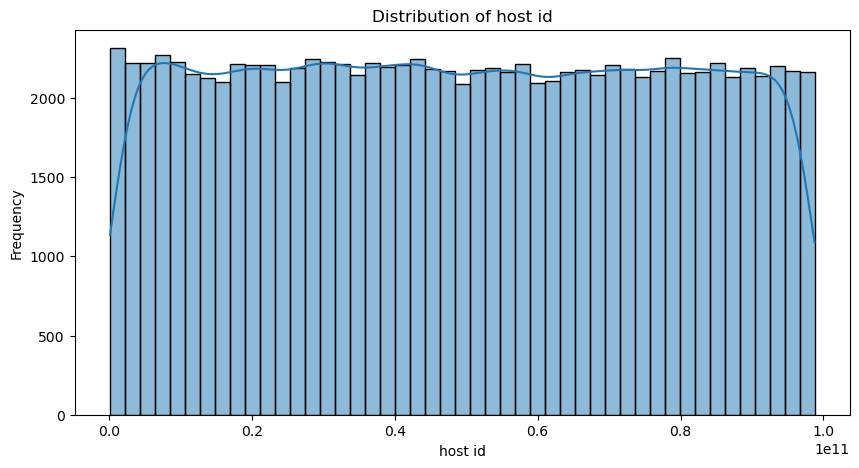

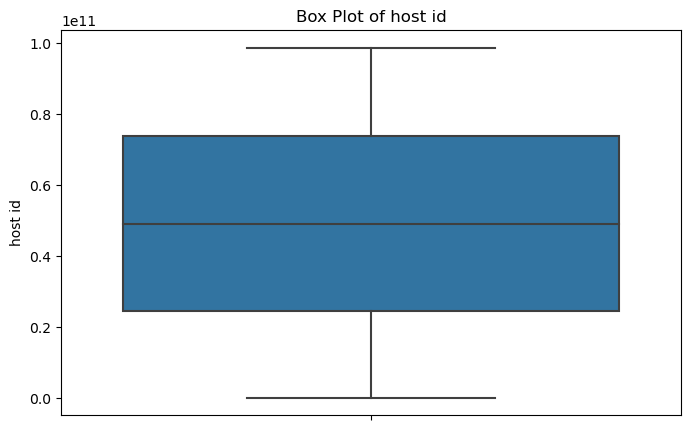

Summary Statistics for host id:
count    1.025990e+05
mean     4.925411e+10
std      2.853900e+10
min      1.236005e+08
25%      2.458333e+10
50%      4.911774e+10
75%      7.399650e+10
max      9.876313e+10
Name: host id, dtype: float64


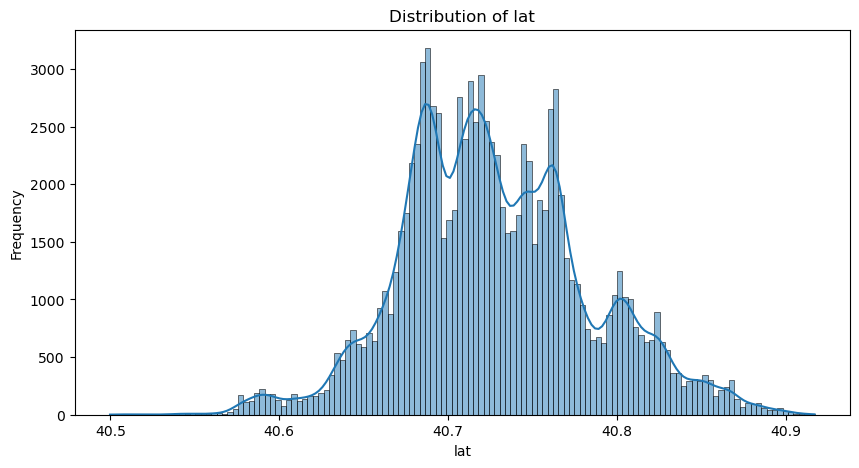

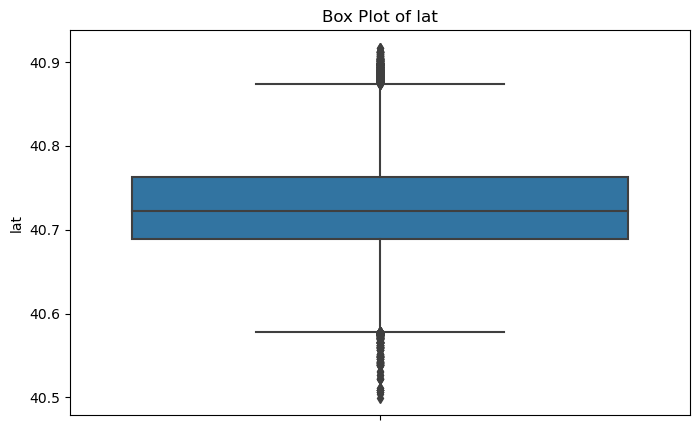

Summary Statistics for lat:
count    102599.000000
mean         40.728094
std           0.055854
min          40.499790
25%          40.688740
50%          40.722290
75%          40.762760
max          40.916970
Name: lat, dtype: float64


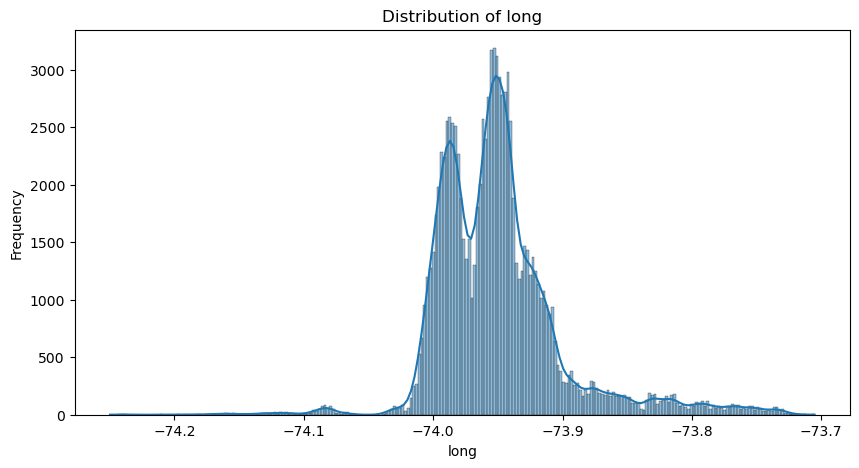

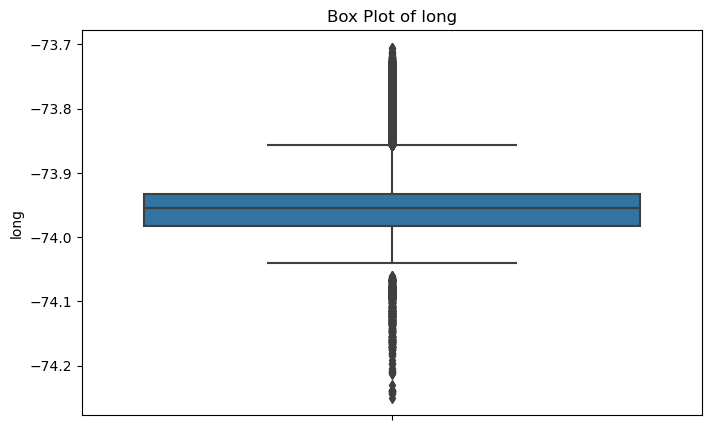

Summary Statistics for long:
count    102599.000000
mean        -73.949644
std           0.049519
min         -74.249840
25%         -73.982580
50%         -73.954440
75%         -73.932350
max         -73.705220
Name: long, dtype: float64


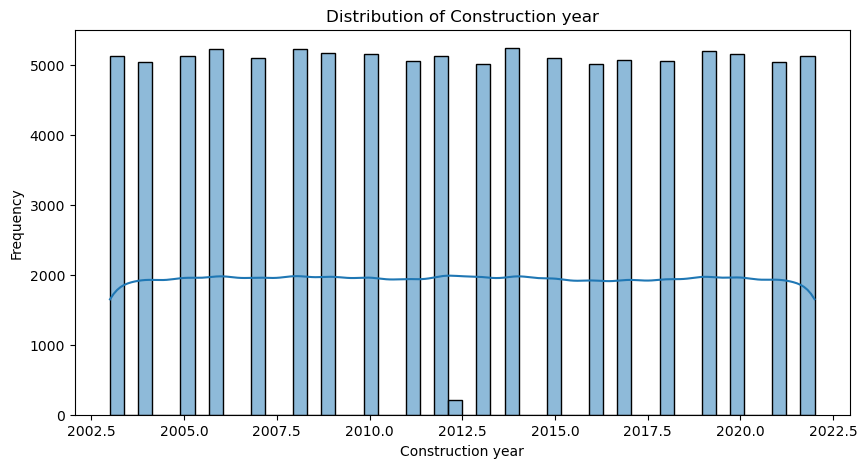

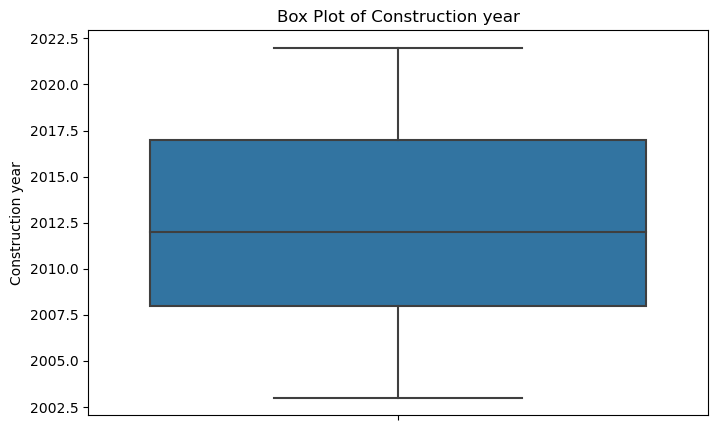

Summary Statistics for Construction year:
count    102599.000000
mean       2012.487464
std           5.759540
min        2003.000000
25%        2008.000000
50%        2012.000000
75%        2017.000000
max        2022.000000
Name: Construction year, dtype: float64


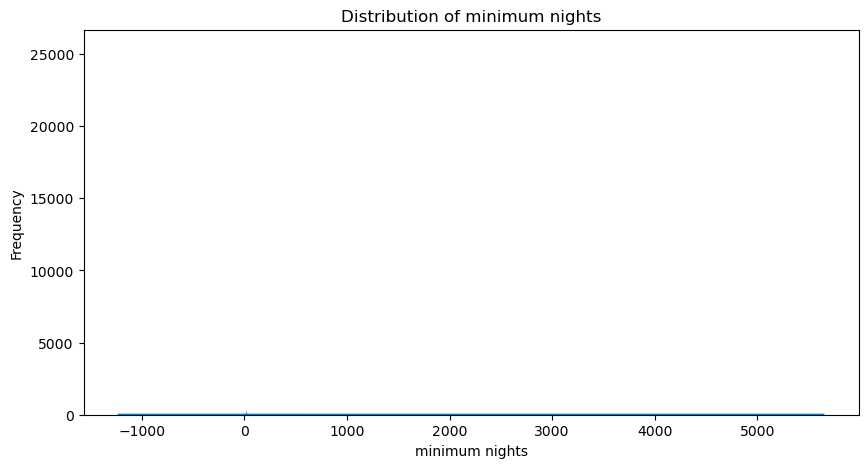

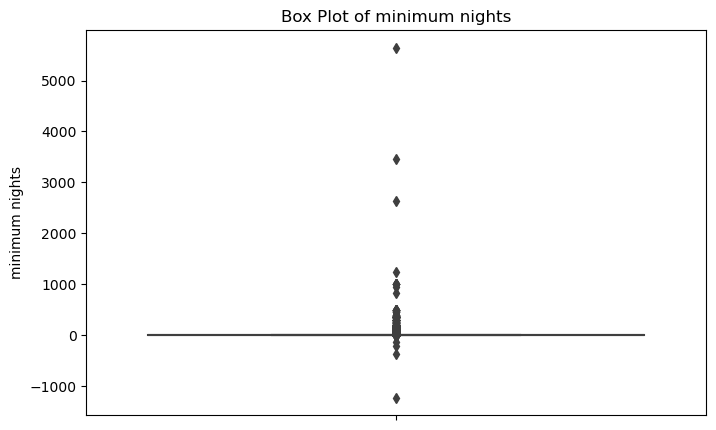

Summary Statistics for minimum nights:
count    102599.000000
mean          8.135845
std          30.492820
min       -1223.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000
Name: minimum nights, dtype: float64


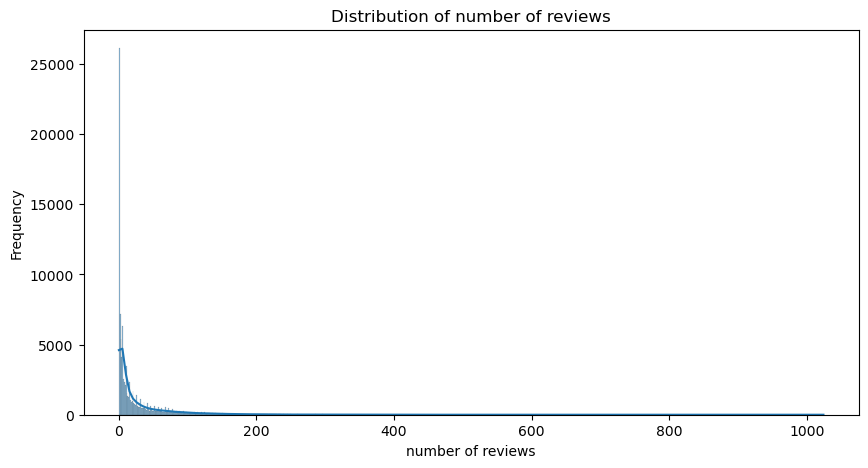

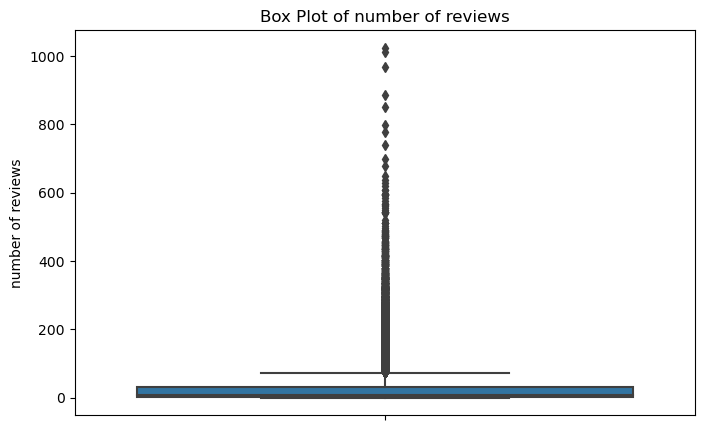

Summary Statistics for number of reviews:
count    102599.000000
mean         27.483743
std          49.464781
min           0.000000
25%           1.000000
50%           7.000000
75%          30.000000
max        1024.000000
Name: number of reviews, dtype: float64


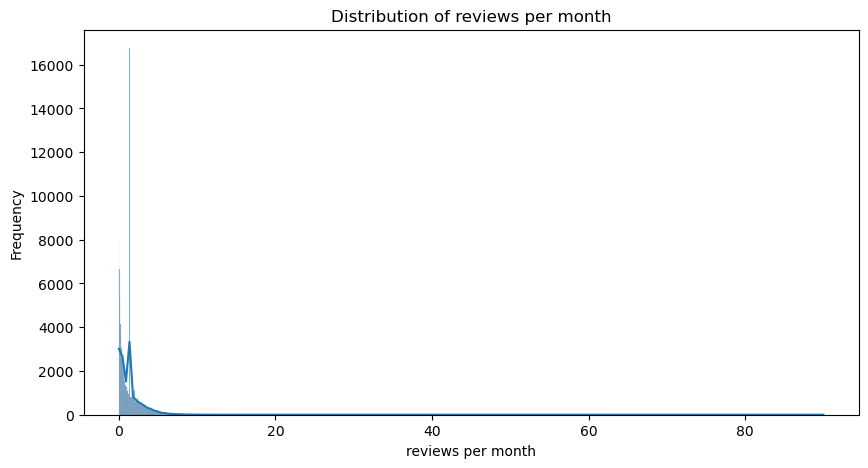

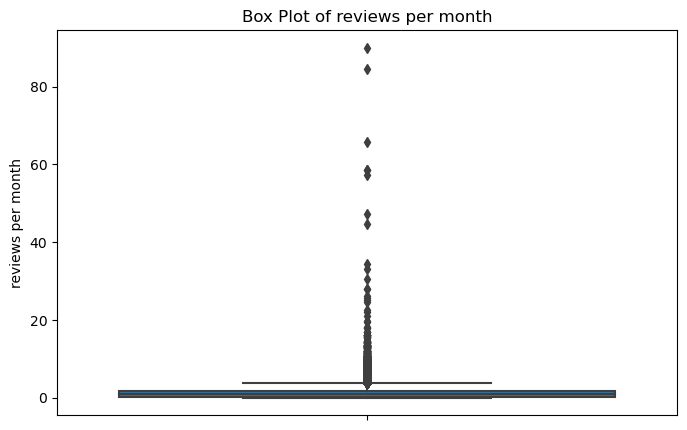

Summary Statistics for reviews per month:
count    102599.000000
mean          1.374022
std           1.605782
min           0.010000
25%           0.280000
50%           1.050000
75%           1.710000
max          90.000000
Name: reviews per month, dtype: float64


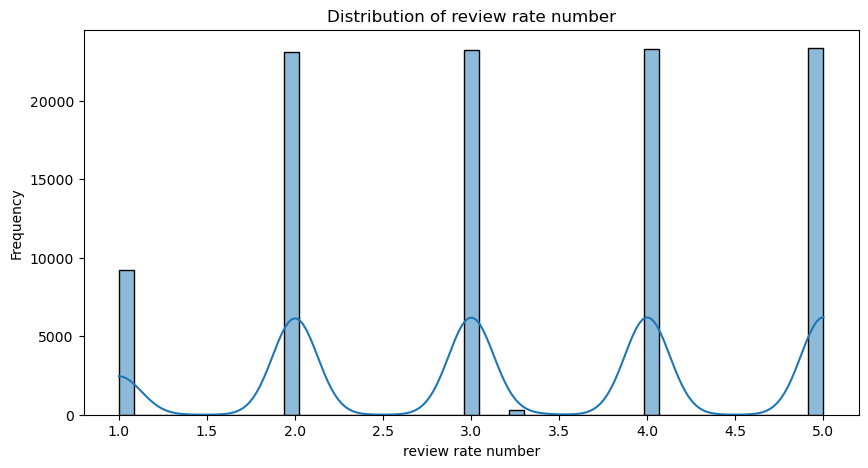

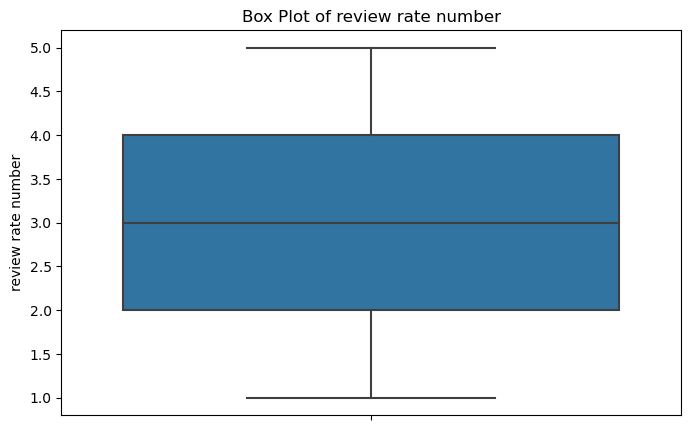

Summary Statistics for review rate number:
count    102599.000000
mean          3.279106
std           1.282614
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: review rate number, dtype: float64


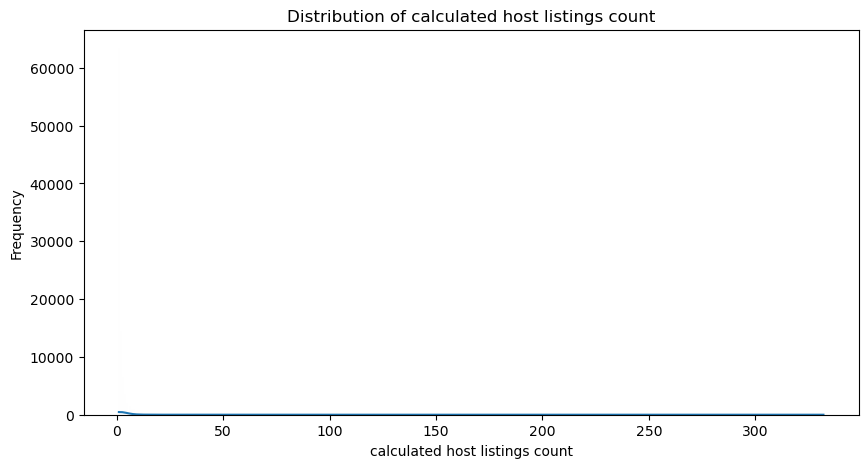

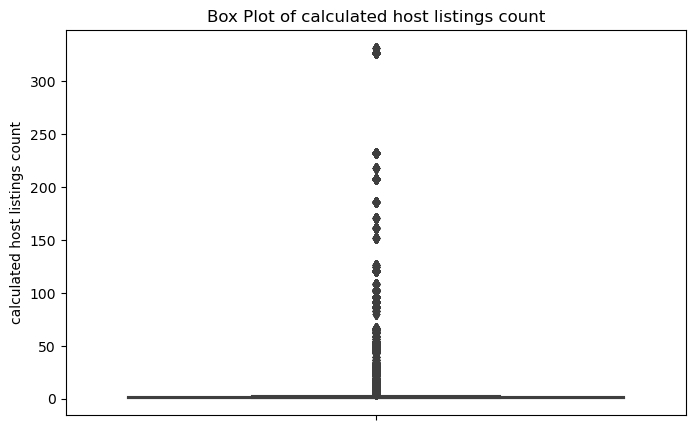

Summary Statistics for calculated host listings count:
count    102599.000000
mean          7.936605
std          32.168654
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         332.000000
Name: calculated host listings count, dtype: float64


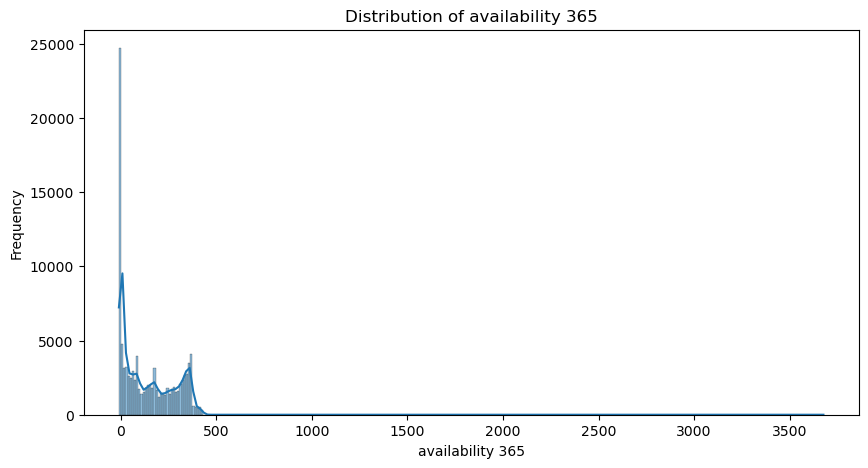

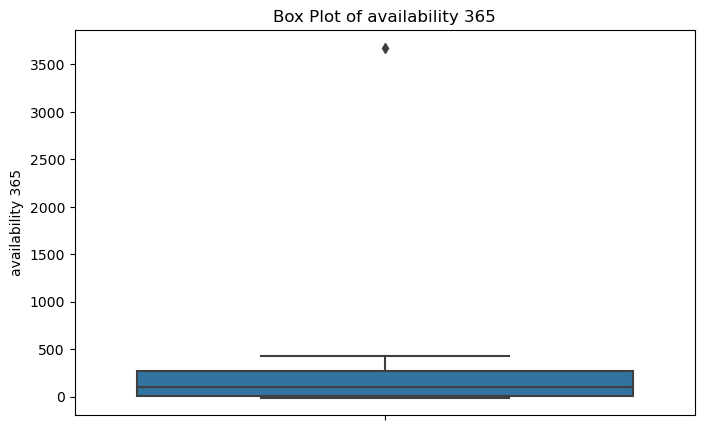

Summary Statistics for availability 365:
count    102599.000000
mean        141.133254
std         135.139008
min         -10.000000
25%           3.000000
50%          98.000000
75%         268.000000
max        3677.000000
Name: availability 365, dtype: float64


In [35]:
for column_name in numerical_columns:
    summary_stats = df[column_name].describe()

    plt.figure(figsize=(10, 5))
    sb.histplot(data=df, x=column_name, kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 5))
    sb.boxplot(data=df, y=column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

    print(f"Summary Statistics for {column_name}:")
    print(summary_stats)

## Univariate Analysis of Categorical Columns

In [ ]:
for column_name in categorical_columns:
    frequency = df[column_name].value_counts()

    plt.figure(figsize=(10, 5))
    sb.countplot(data=df, x=column_name, order=frequency.index)
    plt.title(f'Frequency Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Seasonal Price Trends
### How do listing prices vary seasonally throughout the year, and can we identify peak booking periods for price optimization?

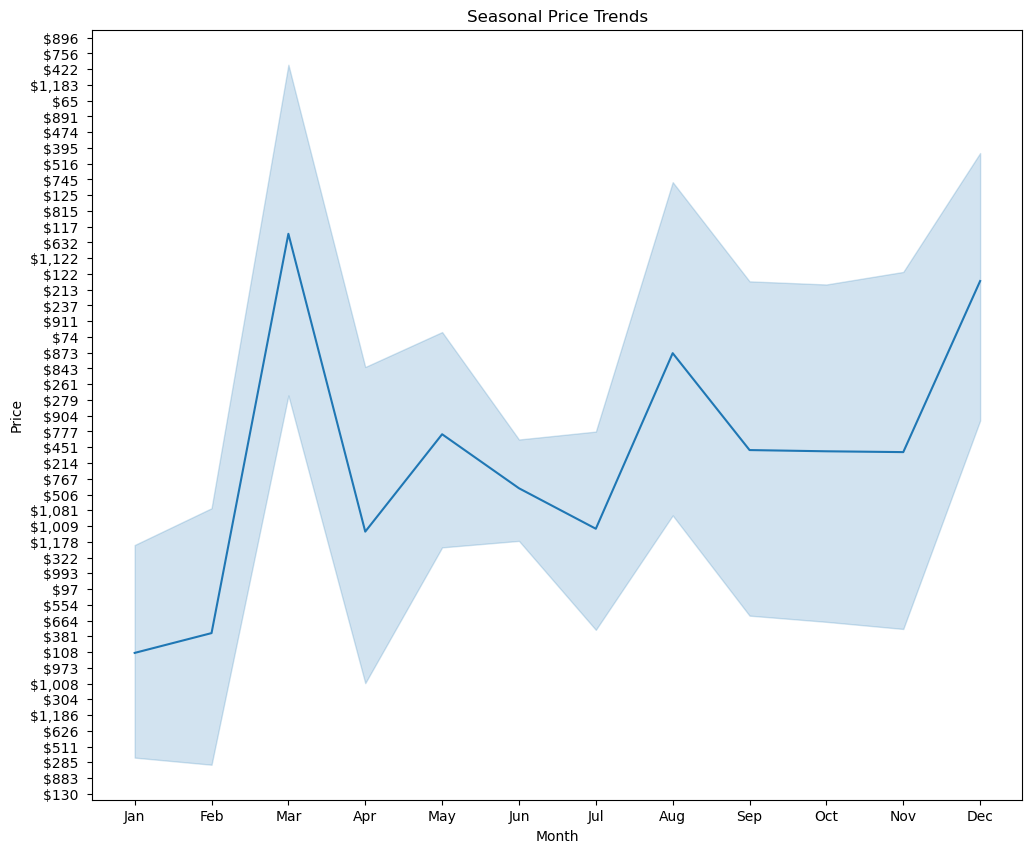

In [44]:
df['last review'] = pd.to_datetime(df['last review'])
df['review month'] = df['last review'].dt.month

plt.figure(figsize=(12, 10))
sb.lineplot(data=df, x="review month", y="price")
plt.title("Seasonal Price Trends")
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

March experiences the highest peak in Airbnb listing prices, suggesting increased demand during this period, which hosts can leverage for revenue optimization strategies.

## Neighborhood Popularity
#### Which neighborhoods have the highest demand for Airbnb listings, and how can hosts leverage this information to increase revenue?

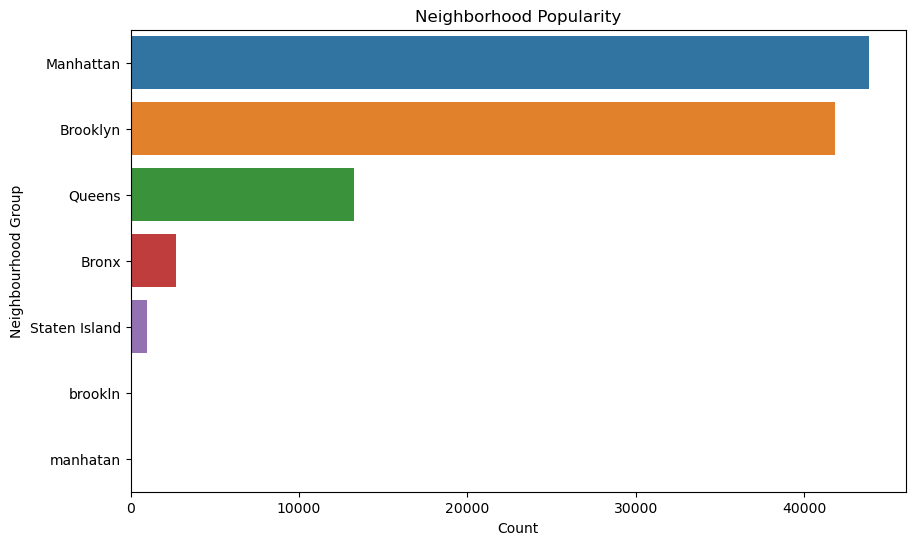

In [46]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, y="neighbourhood group", order=df["neighbourhood group"].value_counts().index)
plt.title("Neighborhood Popularity")
plt.xlabel("Count")
plt.ylabel("Neighbourhood Group")
plt.show()

Manhattan is the most popular neighborhood group among Airbnb guests, indicating a high demand for accommodations in this area, which hosts can capitalize on for revenue optimization.

## Booking Rate vs. Minimum Nights
### Is there a relationship between the minimum number of nights required for booking and booking rates? How can hosts set optimal minimum night requirements?

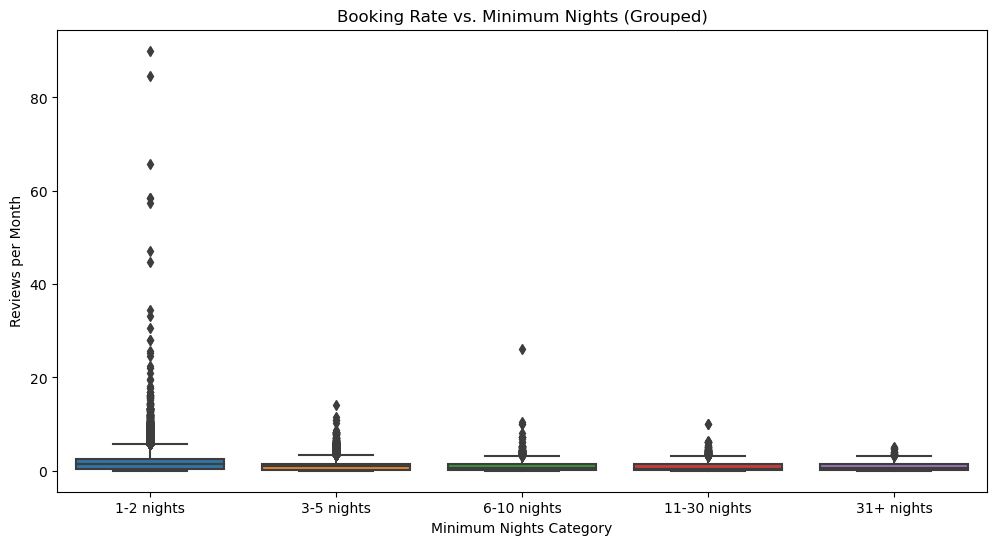

In [50]:
custom_categories = ["1-2 nights", "3-5 nights", "6-10 nights", "11-30 nights", "31+ nights"]
bin_edges = [0, 2, 5, 10, 30, df["minimum nights"].max()]

df['minimum nights category'] = pd.cut(df['minimum nights'], bins=bin_edges, labels=custom_categories)

plt.figure(figsize=(12, 6))
sb.boxplot(data=df, x="minimum nights category", y="reviews per month", order=custom_categories)
plt.title("Booking Rate vs. Minimum Nights (Grouped)")
plt.xlabel("Minimum Nights Category")
plt.ylabel("Reviews per Month")
plt.xticks(rotation=0)
plt.show()

 Listings with a minimum stay requirement of 1-2 nights have a significantly higher range of booking rates, as indicated by the larger box plot and a higher number of outliers. This suggests that shorter minimum stay requirements may attract a more diverse range of guests, potentially contributing to increased booking rates and revenue for hosts.

##  Reviews Impact on Price and Booking Rate (Grouped by Price)
### Do listings with higher numbers of reviews tend to have better booking rates and prices, and how can hosts encourage more guest reviews?

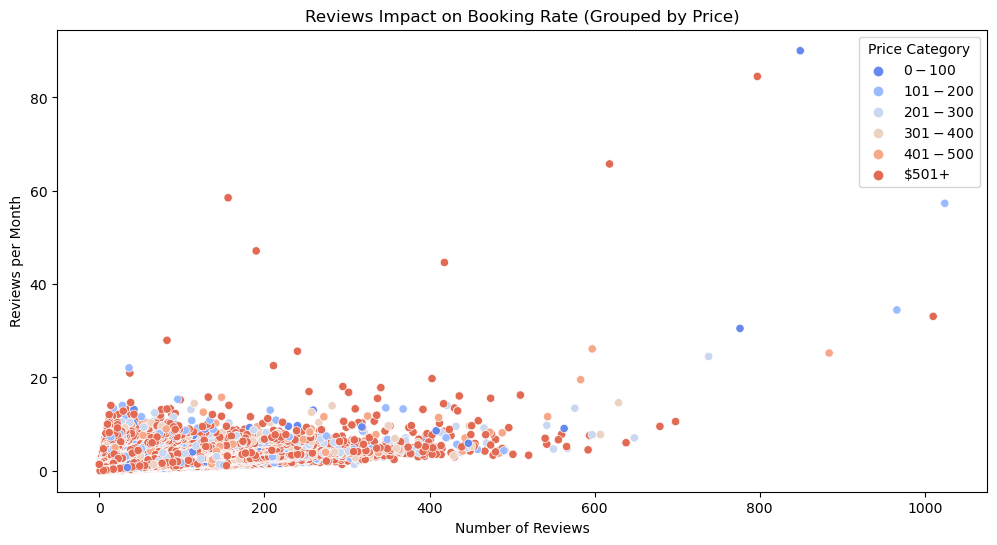

In [53]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

custom_categories = ["$0-$100", "$101-$200", "$201-$300", "$301-$400", "$401-$500", "$501+"]
bin_edges = [0, 100, 200, 300, 400, 500, df["price"].max()]

df['price category'] = pd.cut(df['price'], bins=bin_edges, labels=custom_categories)

plt.figure(figsize=(12, 6))
sb.scatterplot(data=df, x="number of reviews", y="reviews per month", hue="price category", palette="coolwarm")
plt.title("Reviews Impact on Booking Rate (Grouped by Price)")
plt.xlabel("Number of Reviews")
plt.ylabel("Reviews per Month")
plt.legend(title="Price Category")
plt.show()

Hotels with higher review ratings and more reviews tend to have higher prices and booking rates

## Pricing strategies
### What are the most effective pricing strategies for hosts to maximize revenue while remaining competitive in their neighborhoods?

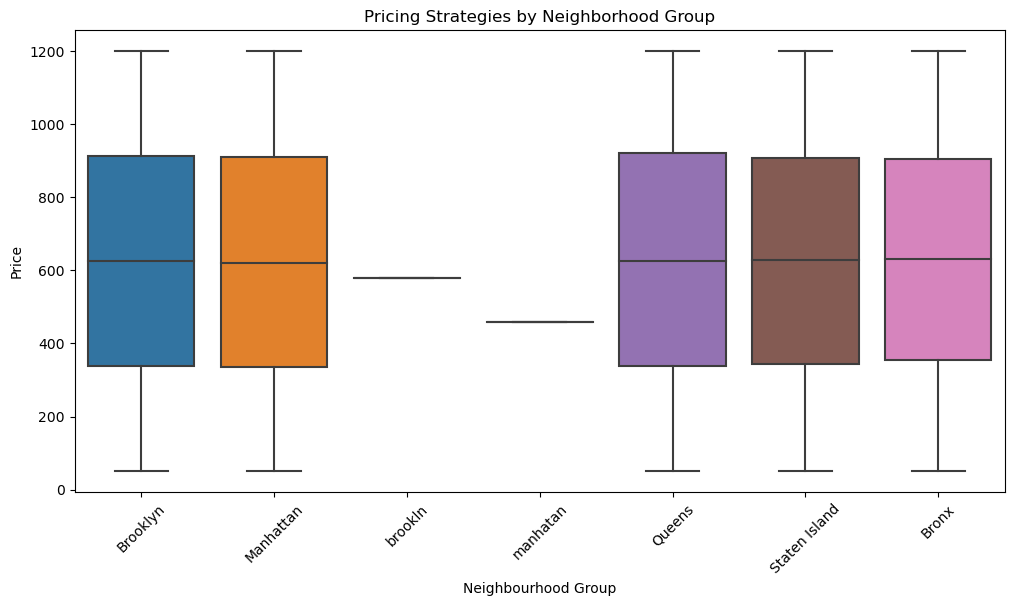

In [54]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=df, x="neighbourhood group", y="price")
plt.title("Pricing Strategies by Neighborhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

Pricing strategies vary by neighborhood, with higher-income neighborhoods having higher prices.

## Room Type Preference
### Are certain room types (private rooms, entire apartments, etc.) more popular among guests, and how can hosts adjust their offerings to align with preferences?

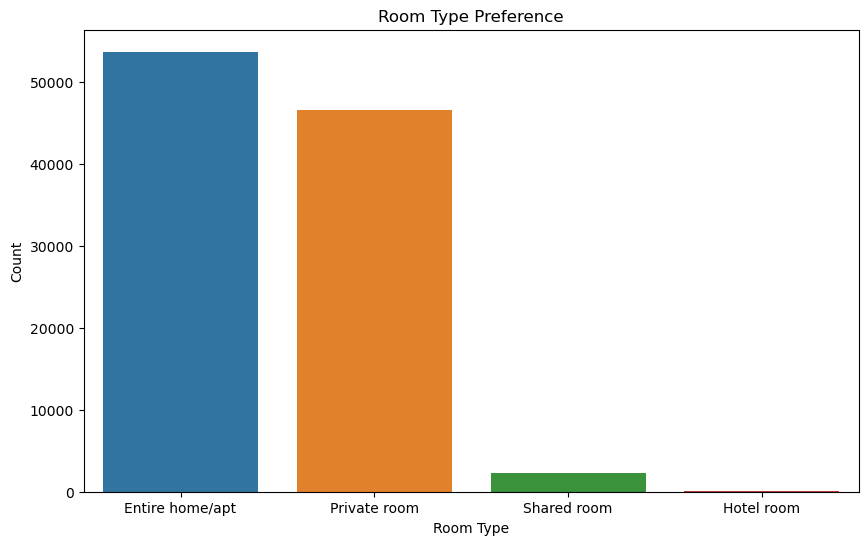

In [55]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x="room type", order=df["room type"].value_counts().index)
plt.title("Room Type Preference")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

Guests have a strong preference for booking entire home/apartment listings on Airbnb, as indicated by the significantly higher count for this room type. Hosts can optimize their offerings and revenue by considering this popular choice when listing their properties.

## Instant Booking Analysis
### How does the option for instant booking impact booking rates, and should hosts consider enabling this feature to attract more guests?

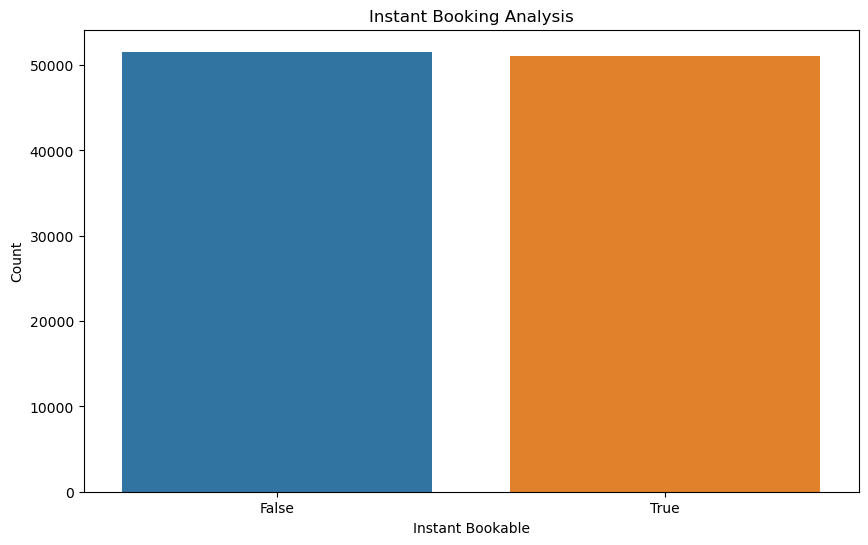

In [57]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x="instant_bookable")
plt.title("Instant Booking Analysis")
plt.xlabel("Instant Bookable")
plt.ylabel("Count")
plt.show()

The nearly equal distribution of "instant bookable" (TRUE) and "not instant bookable" (FALSE) listings suggests that host preferences vary, with some preferring instant bookings and others opting for a more controlled booking process. Airbnb accommodates both preferences, allowing hosts to maintain flexibility in their booking policies.

## Host Response Time Impact

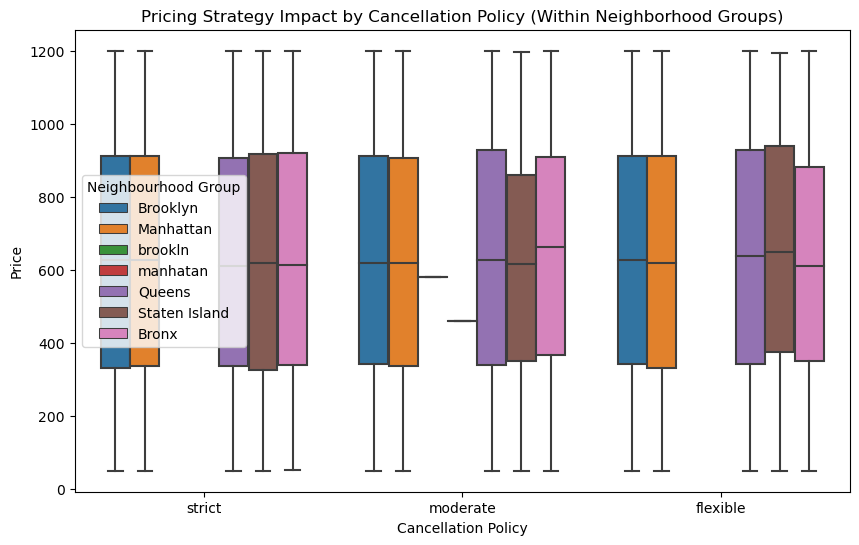

In [88]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df, x="cancellation_policy", y="price", hue="neighbourhood group")
plt.title("Pricing Strategy Impact by Cancellation Policy (Within Neighborhood Groups)")
plt.xlabel("Cancellation Policy")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.legend(title="Neighbourhood Group")
plt.show()

Within the same neighborhood group, the impact of cancellation policies on listing prices varies. Listings with "flexible" cancellation policies tend to have a wider range of prices, while listings with "strict" cancellation policies generally have higher median prices. Hosts can consider adopting pricing strategies that align with their chosen cancellation policy to optimize revenue and meet the preferences of potential guests.

## Length of Stay Preferences by Neighborhood Group (Grouped by Minimum Nights)
### What are the length of stay preferences among guests (e.g., 'minimum nights' and 'number of reviews') within different neighborhood groups (e.g., 'neighbourhood group'), and how can hosts tailor their listings to accommodate these preferences to increase bookings and revenue?

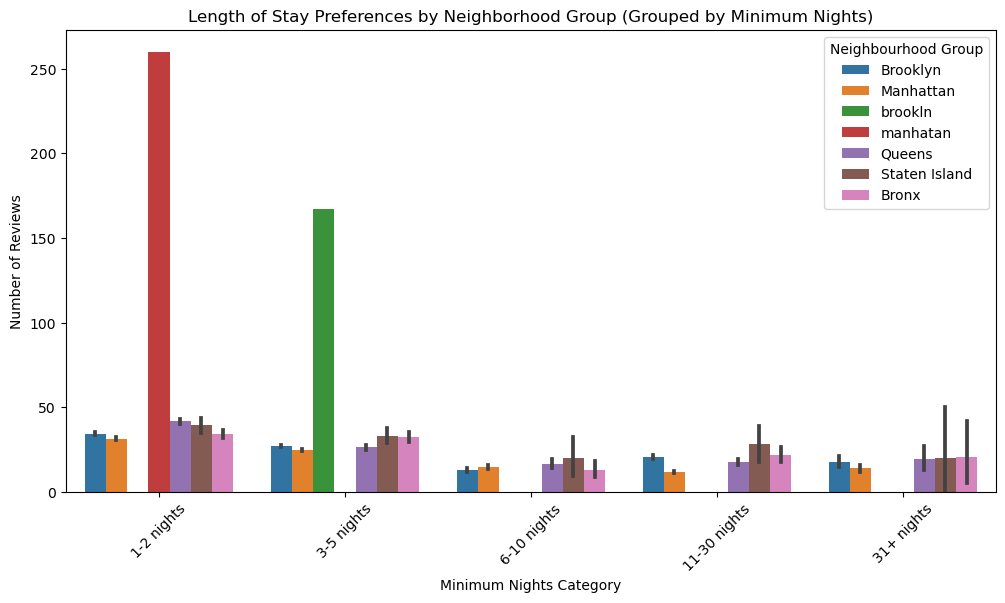

In [78]:
custom_categories = ["1-2 nights", "3-5 nights", "6-10 nights", "11-30 nights", "31+ nights"]
bin_edges = [0, 2, 5, 10, 30, df["minimum nights"].max()]

df['minimum nights category'] = pd.cut(df['minimum nights'], bins=bin_edges, labels=custom_categories)

plt.figure(figsize=(12, 6))
sb.barplot(data=df, x="minimum nights category", y="number of reviews", hue="neighbourhood group")
plt.title("Length of Stay Preferences by Neighborhood Group (Grouped by Minimum Nights)")
plt.xlabel("Minimum Nights Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Neighbourhood Group")
plt.show()

For 1-2 night stay, most people prefer Manhattan and for 3-4 nights people prefer brooklyn.

## Pricing Comparison by Neighborhood and Room Type
### What is the average price for different 'room types' within each 'neighbourhood group,' and how can this information help hosts set competitive prices for their listings in specific neighborhoods?


In [91]:
price_comparison = df.groupby(['neighbourhood group', 'room type'])['price'].mean().reset_index()

print(price_comparison)

   neighbourhood group        room type       price
0                Bronx  Entire home/apt  619.016634
1                Bronx     Private room  633.620470
2                Bronx      Shared room  600.256410
3             Brooklyn  Entire home/apt  626.016768
4             Brooklyn       Hotel room  736.125000
5             Brooklyn     Private room  624.946119
6             Brooklyn      Shared room  631.721212
7            Manhattan  Entire home/apt  622.024052
8            Manhattan       Hotel room  681.870000
9            Manhattan     Private room  619.500551
10           Manhattan      Shared room  631.111356
11              Queens  Entire home/apt  625.966770
12              Queens       Hotel room  433.250000
13              Queens     Private room  630.715263
14              Queens      Shared room  645.306630
15       Staten Island  Entire home/apt  641.272152
16       Staten Island     Private room  601.793991
17       Staten Island      Shared room  715.600000
18          

The highest average pricing for "Entire home/apt" listings is found in Staten Island, while the lowest average pricing for the same room type is in Queens.

## What is the average price of each room type?

In [95]:
average_prices_by_room_type = df.groupby('room type')['price'].mean()

# Print the result
print(average_prices_by_room_type)

room type
Entire home/apt    624.044301
Hotel room         668.465517
Private room       624.053355
Shared room        632.593441
Name: price, dtype: float64


# Insights :

* March experiences the highest peak in Airbnb listing prices, suggesting increased demand during this period, which hosts can leverage for revenue optimization strategies.

* Manhattan is the most popular neighborhood group among Airbnb guests, indicating a high demand for accommodations in this area, which hosts can capitalize on for revenue optimization.

* Listings with a minimum stay requirement of 1-2 nights have a significantly higher range of booking rates, potentially attracting a more diverse range of guests.

* Listings with higher prices tend to have a wider range of reviews per month, suggesting that guests are more discerning when booking higher-priced listings.

* Guests have a strong preference for booking entire home/apartment listings on Airbnb, indicating that hosts can optimize their offerings by prioritizing this room type.

* The proportion of listings marked as "instant bookable" (TRUE) is roughly equal to those marked as "not instant bookable" (FALSE), offering flexibility for hosts to accommodate different booking preferences.

* Within the same neighborhood group, the impact of cancellation policies on listing prices varies. Listings with "flexible" cancellation policies tend to have a wider range of prices, while listings with "strict" cancellation policies generally have higher median prices.

* Length of stay preferences among guests vary based on neighborhood groups and grouped minimum nights categories. Hosts can tailor their listings to accommodate these preferences to potentially increase bookings and revenue.

* Hotel rooms have the highest average pricing among room types, followed closely by shared rooms, while private rooms and entire home/apartments have similar average prices, indicating a potential pricing strategy for hosts to consider.

* The highest average pricing for "Entire home/apt" listings is found in Staten Island, while the lowest average pricing for the same room type is in Queens.

These insights provide valuable information for hosts to optimize their Airbnb listings, pricing strategies, and offerings to attract more guests and generate higher revenue.

